this is folked kernel with japanese comment for education

# ホーム・クレジット社 債務不履行リスク - データ探索 + 基本モデル

融資履歴が少なかったり無かったりするために、多くの人々が融資を受けるのに苦労しています。  
そして、残念なことに、このような人々は、怪しげな金貸し屋によってしばしばカモにされます。  
ホームクレジット社は、ポジティブで安全な借入経験を提供することによって、  
銀行口座を持たない人々のためのファイナンシャル・インクルージョン (貧困層に正規の金融取引ができるように改善する解決策を提供すること) を広めるために努力しています。  
この金銭的に不利な人々がポジティブな借入経験を持つことを確実にするために、ホームクレジットは電話や取引情報を含むさまざまな代替データを利用しています。
そして顧客の返済能力を予測しています。

ホームクレジット社は現在、これらの予測を行うためにさまざまな統計的方法や機械学習方法を使用していますが、  
ホームクレジット社は社の持つデータの潜在能力を最大限に発揮するためにKagglersに挑戦を挑みました。  
このコンペにより、返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供することが可能となるでしょう。

これはホーム・クレジット社債務不履行データについてのデータ探索と基本モデルについての簡単なノートブックです。  
**Contents**   
1. Dataset Preparation    
2. Exploration - Applications Train  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Snapshot - Application Train    
&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Distribution of Target Variable    
&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Gender and Contract Type Distribution and Target Variable    
&nbsp;&nbsp;&nbsp;&nbsp; 2.4 Own Realty and Own Car  - Distribution with Target Variable  
&nbsp;&nbsp;&nbsp;&nbsp; 2.5 Suit Type and Income Type    
&nbsp;&nbsp;&nbsp;&nbsp; 2.6 Family Statue and Housing Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.7 Education Type and Income Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.1 Organization Type and Occupation Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.2 Walls Material, Foundation and House Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.9 Amount Credit Distribution    
&nbsp;&nbsp;&nbsp;&nbsp; 2.10 Amount Annuity Distribution  
&nbsp;&nbsp;&nbsp;&nbsp; 2.11 Amount Goods Price   
&nbsp;&nbsp;&nbsp;&nbsp; 2.12 Amount Region Population Relative    
&nbsp;&nbsp;&nbsp;&nbsp; 2.13 Days Birth   
&nbsp;&nbsp;&nbsp;&nbsp; 2.14 Days Employed    
&nbsp;&nbsp;&nbsp;&nbsp; 2.15 Num Days Registration  
&nbsp;&nbsp;&nbsp;&nbsp; 2.15 Count of Family Members  
3. Exploration - Bureau Data  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Snapshot - Bureau Data    
4. Exploration - Bureau Balance Data  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Snapshot - Bureau Balance Data     
5. Exploration - Credit Card Balance Data   
&nbsp;&nbsp;&nbsp;&nbsp; 5.1 Snapshot - Credit Card Balance Data   
6. Exploration - POS Cash Balance Data   
&nbsp;&nbsp;&nbsp;&nbsp; 6.1 Snapshot - POS Cash Balance Data   
7. Exploration - Previous Application Data   
&nbsp;&nbsp;&nbsp;&nbsp; 7.1 Snapshot - Previous Application Data  
&nbsp;&nbsp;&nbsp;&nbsp; 7.2 Contract Status Distribution - Previous Applications  
&nbsp;&nbsp;&nbsp;&nbsp; 7.3 Suite Type Distribution - Previous Application    
&nbsp;&nbsp;&nbsp;&nbsp; 7.4 Client Type Distribution  - Previous Application    
&nbsp;&nbsp;&nbsp;&nbsp; 7.5 Channel Type Distribution - Previous Applications  
7. Exploration - Installation Payments  
&nbsp;&nbsp;&nbsp;&nbsp; 8.1 Snapshot of Installation Payments  
9. Baseline Model  
&nbsp;&nbsp;&nbsp;&nbsp; 9.1 Dataset Preparation  
&nbsp;&nbsp;&nbsp;&nbsp; 9.2 Label Encoding     
&nbsp;&nbsp;&nbsp;&nbsp; 9.3 Validation Sets Preparation    
&nbsp;&nbsp;&nbsp;&nbsp; 9.4 Model Fitting    
&nbsp;&nbsp;&nbsp;&nbsp; 9.5 Feature Importance    
&nbsp;&nbsp;&nbsp;&nbsp; 9.6 Prediction 



## 1. Dataset Preparation 

In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "../input/"

def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    """
    横向き棒グラフ作成関数
    df:  
    col: 
    title: 
    color: 
    w=None: 
    h=None: 
    lm=0: 
    limit=100: 
    return_trace=False: 
    rev=False: 
    xlb = False:
    """
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    """
    グループ化棒グラフを表示
    col: 表示する列
    title: 図のタイトル
    """
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()

    trace1 = go.Bar(x=a1.index, y=a1.values, name='Target : 1', marker=dict(color="#44ff54"))
    trace2 = go.Bar(x=b1.index, y=b1.values, name='Target : 0', marker=dict(color="#ff4444"))

    data = [trace1, trace2]
    layout = go.Layout(barmode='group', height=300, title = title)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='grouped-bar')

## 2. データ探索: Application (ローン申込書)

## 2.1 Application Train の概観

Application データは全ローン申込書の統計情報からなり、各行が1つのローンを表す。

In [2]:
app_train = pd.read_csv(path + "application_train.csv") # application train データの読み込み
app_train.head() # 最初の5行を表示

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


> 307,511件のローンのデータがあり、列数は122です。

## 2.2 目的変数の分布
目的変数
- 1: 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合
- 0: それ以外の場合

In [3]:
# 目的変数の分布
# 横向き棒グラフの表示
bar_hor(app_train, # 表示するデータ 
        "TARGET", # 表示する列名
        "Distribution of Target Variable" , # 図のタイトル
        ["#44ff54", '#ff4444'], # 棒グラフの色
        h=400, # 図の高さ
        w=800, # 図の幅
        lm=100, # ?
        xlb = ['Target : 1','Target : 0'] # 各バーの説明
       )

> - 目的変数は約282k (85%) が 0 で、わずか24kが 1 です。

## 2.3 どの性別、どの契約タイプがローンを申し込んでいるか
- 性別: クライアントの性別  
- 契約タイプ: ローンがキャッシュかリボ払いか  

### 2.3.1 性別・契約タイプの分布

In [4]:
tr1 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#639af2", w=700, lm=100, return_trace= True) # 性別の棒グラフ
tr2 = bar_hor(app_train, "NAME_CONTRACT_TYPE", "Distribution of NAME_CONTRACT_TYPE Variable" ,"#a4c5f9", w=700, lm=100, return_trace = True) # 契約タイプの棒グラフ

# 図の整形・表示
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Gender' , 'Contract Type'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(b=100));
iplot(fig);

> 性別については、女性が多く (202448) 男性は少ない (105059)。  
> 契約タイプについてはキャッシュが主でリボ払いは約29kとかなり少ない。

### 2.3.2 性別・契約タイプと目的変数との関係

In [5]:
# 性別・目的変数のグループ化棒グラフ
gp('CODE_GENDER', # 表示する列名
   'Distribution of Target with Gender' # 図のタイトル
  ) 
gp('NAME_CONTRACT_TYPE', 'Distribution of Target with Contract Type') # 契約タイプ・目的変数のグループ化棒グラフ

## 2.4. 土地所有・車所有

In [6]:
tr1 = bar_hor(app_train, "FLAG_OWN_REALTY", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "FLAG_OWN_CAR", "Distribution of FLAG_OWN_CAR" ,"#639af2", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Own Realty' , 'Own CAR'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(b=100));
iplot(fig);


gp('FLAG_OWN_REALTY', 'Distribution of Target with FLAG_OWN_REALTY')
gp('FLAG_OWN_CAR', 'Distribution of Target with FLAG_OWN_CAR Type')

## 2.5 同伴者・収入形態
- 同伴者 (NAME_TYPE_SUITE): 借入申請書提出時に同伴した人物

### 2.5.1 同伴者・収入形態の値

In [7]:
tr1 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of NAME_TYPE_SUITE" ,"#639af2", w=700, lm=100, return_trace= True) # 世帯構成タイプの棒グラフ
tr2 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_INCOME_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True) # 収入タイプの棒グラフ

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> 同伴者のトップ3は同伴者なし (250k)、家族、夫婦である。
> 収入形態は8タイプがありトップは:  
    - Working Class労働階級 (158K)
    - Pensiner 年金受給者 (55K)同伴者

### 2.5.2 同伴者・収入形態と目的変数との関係

In [8]:
gp('NAME_TYPE_SUITE', 'Target with respect to Suite Type of Applicants')
gp('NAME_INCOME_TYPE', 'Target with respect to Income Type of Applicants')

## 2.6. 婚姻状況・住居

### 2.6.1 婚姻状況・住居の値

In [9]:
tr1 = bar_hor(app_train, "NAME_FAMILY_STATUS", "Distribution of NAME_FAMILY_STATUS" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of NAME_HOUSING_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> - 既婚の顧客が最も多く (約196k) 独身がそれに続く。
> - 住居は多くが "一軒家/アパート" で85%を占め、両親と同居、公営住宅が続く。

### 2.6.2 婚姻状況・住居と目的変数との関係

In [10]:
gp('NAME_FAMILY_STATUS', 'Target and Family Status')
gp('NAME_HOUSING_TYPE', 'Target and Housing Type')

## 2.7. 教育

### 2.7.1 教育の分布

In [11]:
tr1 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of NAME_EDUCATION_TYPE" ,"#639af2", w=700, lm=100, return_trace= True)
# tr2 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_FAMILY_STATUS" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=1, print_grid=False, subplot_titles = ['NAME_EDUCATION_TYPE' ])
fig.append_trace(tr1, 1, 1);
# fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> 多くの割合が中等教育に占められ (218k)、高等教育 (75k) がそれに続く。

### 2.7.2 教育と目的変数との関係

In [12]:
gp('NAME_EDUCATION_TYPE', 'Education Type and Target')

## 2.8. 組織・業種
-  組織: クライアントが働いている組織
-  業種: クライアントの業種

### 2.8.1 組織・業種の分布

In [13]:
tr1 = bar_hor(app_train, "ORGANIZATION_TYPE", "Distribution of ORGANIZATION_TYPE" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "OCCUPATION_TYPE", "Distribution of OCCUPATION_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['ORGANIZATION_TYPE' , 'OCCUPATION_TYPE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=200));
iplot(fig);

> 申請者の中で多い業種は労働者 (55k)、販売員 (32k)、コアスタッフ (28k)  
> 多い組織は第3種法人が最多で67kを占める

### 2.8.2 組織・業種と目的変数との関係

In [14]:
gp('ORGANIZATION_TYPE', 'Organization Type and Target')
gp('OCCUPATION_TYPE', 'Occupation Type and Target')

### 2.8.3. 壁の種類・基礎の種類・家屋の種類の分布
変数の意味がよくわかりません…

In [15]:
tr1 = bar_hor(app_train, "WALLSMATERIAL_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)
tr2 = bar_hor(app_train, "FONDKAPREMONT_MODE", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr3 = bar_hor(app_train, "HOUSETYPE_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ['WALLSMATERIAL_MODE' , 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig.append_trace(tr3, 1, 3);

fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> - 平屋が150kでほとんどを占め、特殊家屋、テラスハウスは1500以下である。
> - 壁はパネル、石・レンガがほぼ同数で120k近くを占める。

### 2.8.4 壁の種類・基礎の種類・家屋の種類と目的変数との関係

In [16]:
gp('WALLSMATERIAL_MODE', 'Wall Material and Target')
gp('FONDKAPREMONT_MODE', 'Foundation and Target')
gp('HOUSETYPE_MODE', 'House Type and Target')

## 2.9. 借金額の分布

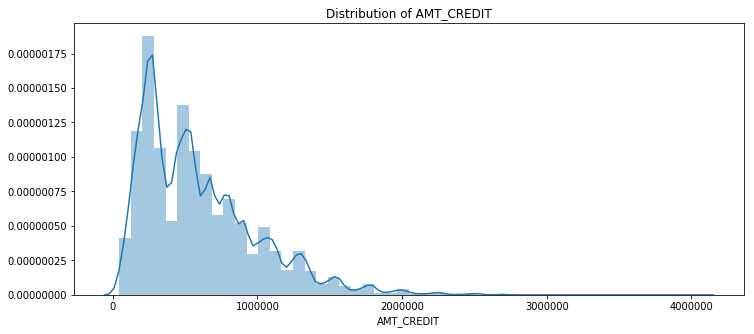

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

## 2.10 年金の分布
- 年金: ローン年金 (って何?)

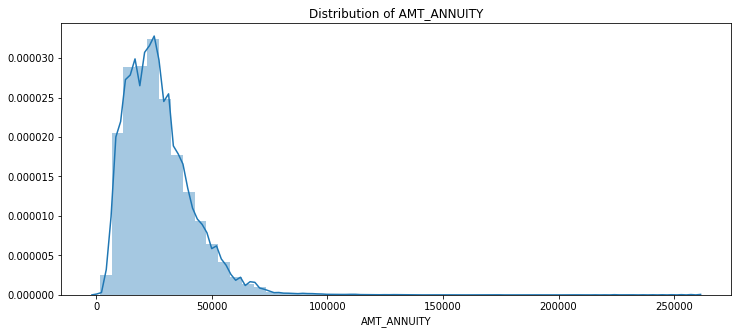

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(app_train["AMT_ANNUITY"].dropna())

## 2.11 商品価格の分布
- 商品価格: ローンを組む目的である商品の価格

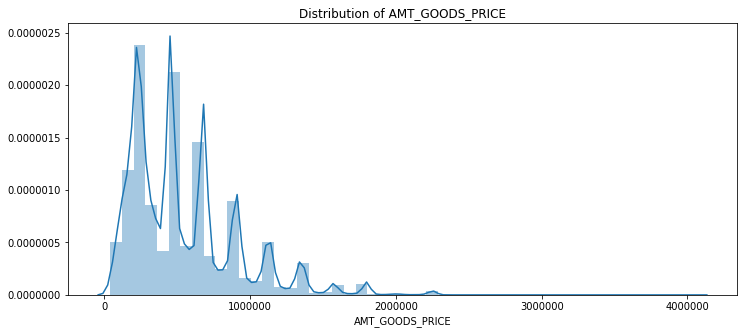

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())
# ax = sns.distplot(app_train["CNT_CHILDREN"], kde = False)

## 2.12 相対地域人口分布の分布
- 相対地域人口: 正規化されたクライアントが住んでいる地域の人口 (クライアントがより人工の多い地域に住んでいることを表す) 

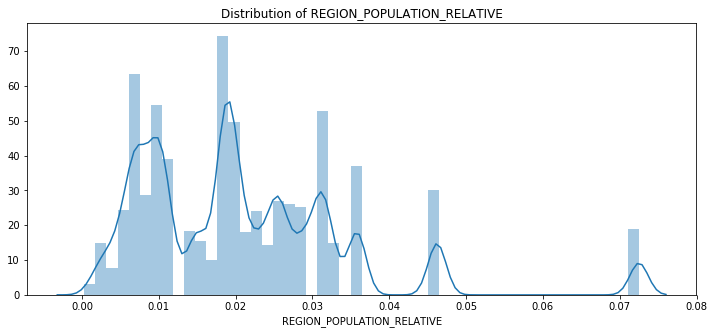

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of REGION_POPULATION_RELATIVE")
ax = sns.distplot(app_train["REGION_POPULATION_RELATIVE"])

## 2.13 年齢の分布
- 年齢: クライアントが借入申請日の何日前に生まれたか

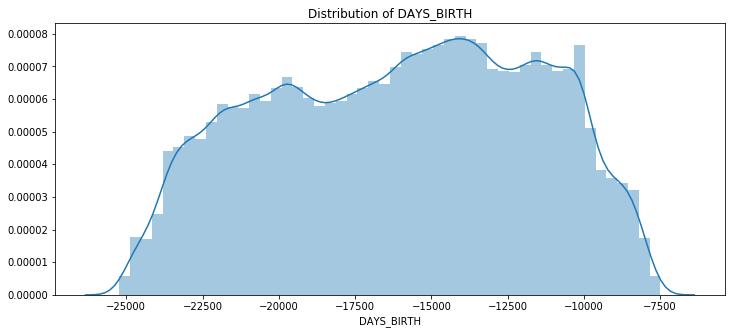

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(app_train["DAYS_BIRTH"])

## 2.14 雇用日数の分布
- 雇用日数: クライアントが借入申請日の何日前から現在の仕事を始めたか

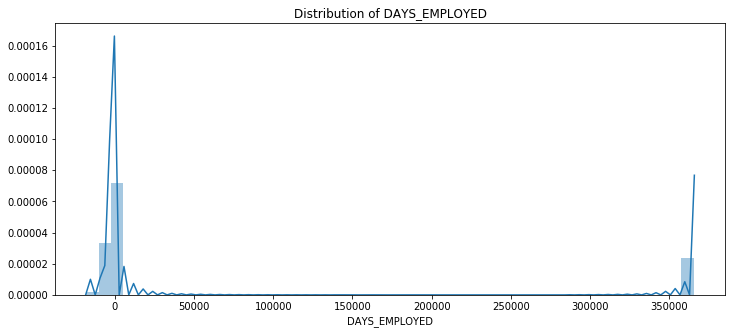

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])

## 2.15 登録日の分布
- 登録日: クライアントが借入申請日の何日前に登録情報を更新したか

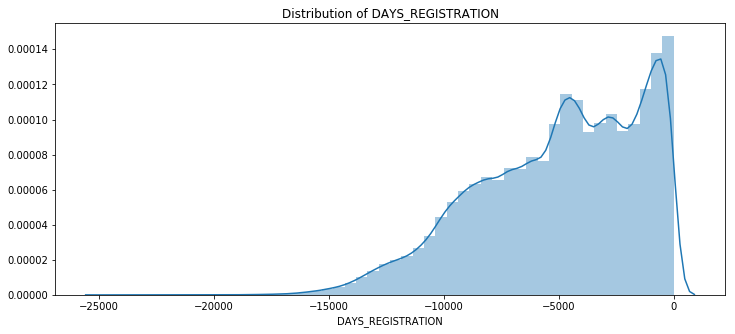

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.distplot(app_train["DAYS_REGISTRATION"])

## 2.16 家族人数

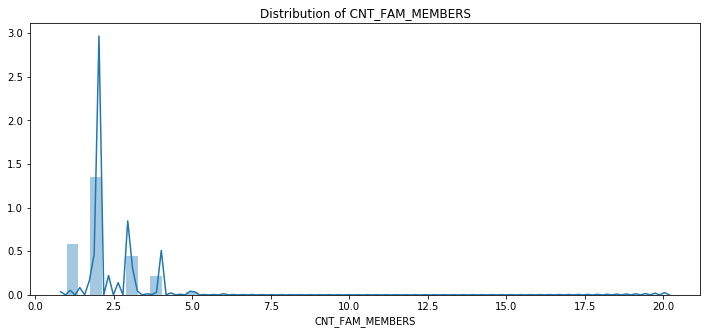

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_FAM_MEMBERS")
ax = sns.distplot(app_train["CNT_FAM_MEMBERS"].dropna())

## 3. 信用情報機関データのデータ探索

信用情報機関によって報告されている顧客の過去の他の金融機関で借入履歴。  
顧客の借入申込日以前の借入回数と同じ行数の借入情報が含まれる。  

## 3.1 信用情報機関データの概観

In [25]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## 4. 信用情報機関残高のデータ探索

信用情報機関の過去の借入の月間残高。   
このテーブルには、過去の借入についての各月の残高が1行ずつ記録されています。  
テーブルの各列には、ある借入のx月 (借入申請からxヶ月前) の債務状況の情報が含まれます。  

## 4.1 信用情報機関残高データの概観

In [26]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## 5. クレジットカード残高のデータ探索

借入申請者の持つホーム・クレジット社製クレジットカードの各月の残高情報。  
このテーブルには、借入申請者の持つホーム・クレジット社製クレジットカード (消費者金融・キャッシュローン) の各月の残高が1行ずつ記録されています。  
テーブルの各列には、あるクレジットカードのx月 (借入申請からxヶ月前) の債務状況の情報が含まれます。 

## 5.1 クレジットカード残高データの概観

In [27]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


## 6. POSキャッシュ残高のデータ探索

借入申請者の持つホーム・クレジットに関する過去のPOSとキャッシュローンの各月の残高情報。  
テーブルの各列には、あるローンのx月 (借入申請からxヶ月前) の債務状況の情報が含まれます。 
このテーブルには、ローン の各月の残高が1行ずつ記録されています。  
(訳注: よくわかりませんでした)

## 6.1 POSキャッシュ残高データの概観

In [28]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## 7. 過去の借入申請書のデータ探索

## 7.1  過去の借入申請書データの概観

In [29]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 7.2 過去の借入申請書の契約状況の分布
- 契約状況:  受理、拒否...

In [30]:
# 契約状況 (受理、拒否、申請キャンセル、申請なし (unused offer))の比率の円グラフを表示
t = previous_application['NAME_CONTRACT_STATUS'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, 
               values=values,
               hoverinfo='', 
               textinfo='',
               textfont=dict(size=12), # フォントサイズ
               marker=dict(colors=colors, # 色設定
                           line=dict(color='#fff', width=2))
              )

layout = go.Layout(title='Name Contract Status in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

>-  多くの人が過去に申請が受理されている (62%)。一方で19%がキャンセル、17%が拒否となっている。

## 7.3 過去の借入申請書の同伴者の分布

In [31]:
t = previous_application['NAME_TYPE_SUITE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Suite Type in Previous Application Distribution', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

>- 過去の申請書の同伴者の多くが同伴者なしであり (60%)、家族がそれに続く (25%)。

## 7.4 過去の借入申請書の顧客タイプ

In [32]:
t = previous_application['NAME_CLIENT_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Client Type in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

>- 過去の借入申請者の74%がリピーターで18%が新規、8%が再登録? (refreshed)である。

## 7.5 チャネルタイプ
- チャネルタイプ: どの方法で借入申請書を受け取ったか

In [33]:
t = previous_application['CHANNEL_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Channel Type in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## 8. 分割支払のデータ探索
## 8.1 分割支払データの概観

In [34]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## 9. ベースライン・モデル

### 9.1 前処理

In [35]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# テストファイル読み込み
app_test = pd.read_csv('../input/application_test.csv')

app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# 目的変数
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# テストID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# 前処理のためにトレインとテストを連結
data = pd.concat([train_X, test_X], axis=0)

### 9.2 カテゴリ変数の処理

より良い処理をしたければOliverの素晴らしいkernelを見に行ってください: https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm 

In [36]:
# カテゴリ変数を取得する関数
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# カテゴリ変数をファクトライズ (整数に置換)する関数
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# カテゴリ変数のダミー変数 (二値変数化)を作成する関数
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# カテゴリ変数を取得
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)

# ダミー変数を取得
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)

# カテゴリ変数をファクトライズ
data = _factorize_categoricals(data, data_cats)

### 9.3 データセットを一箇所にまとめる

In [37]:
## 参考: より良い特徴量 : https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm 

### 過去の申請書情報を現在の申請書情報と結びつける

# IDごとに過去の申請回数をカウント
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

# IDごとに過去の申請書の特徴量の値の平均を取る
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

### 信用情報機関を現在の申請書情報と結びつける

# IDごとに信用情報機関の特徴量の値の平均を取る
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

# 最終的なtrainとtestデータを用意
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

### 9.4 validationデータの作成

In [38]:
x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

### 9.5 モデル (Light GBM)の学習

In [39]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.742551
[400]	valid_0's auc: 0.756112
[600]	valid_0's auc: 0.765772
[800]	valid_0's auc: 0.770478
[1000]	valid_0's auc: 0.773054
[1200]	valid_0's auc: 0.774325
[1400]	valid_0's auc: 0.775255
[1600]	valid_0's auc: 0.775839
[1800]	valid_0's auc: 0.776261
[2000]	valid_0's auc: 0.776443
[2200]	valid_0's auc: 0.776524
[2400]	valid_0's auc: 0.776681
Early stopping, best iteration is:
[2407]	valid_0's auc: 0.776695


### 9.6 特徴量の重要度

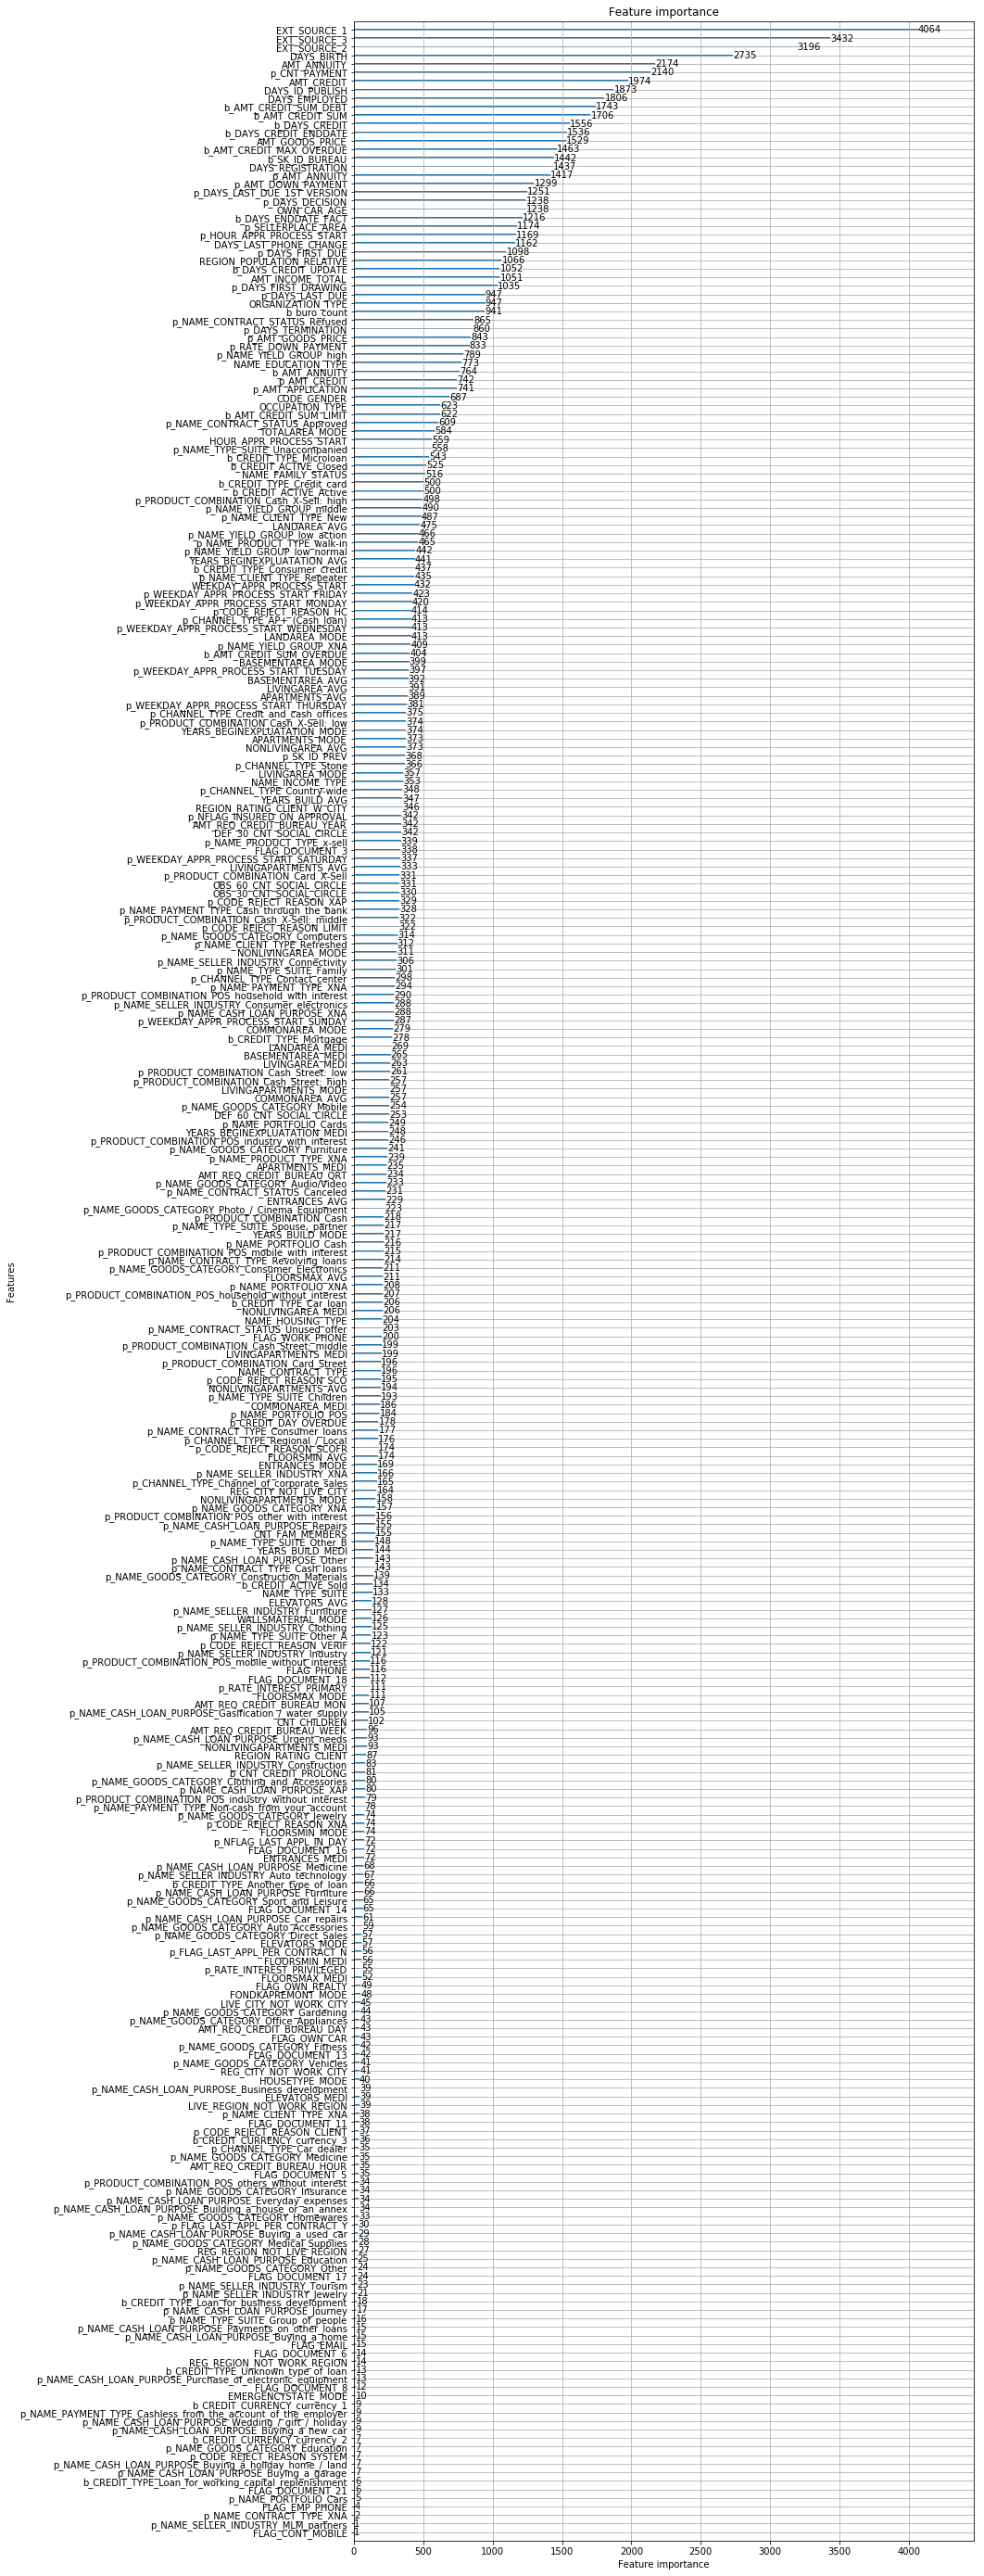

In [40]:
lgb.plot_importance(model, figsize=(12, 50));

### 9.7 推定

In [41]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_baseline.csv", index=False)
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.019330
1,100005,0.143907
2,100013,0.011398
3,100028,0.043388
4,100038,0.162482
